In [100]:
import numpy as np
from scipy.optimize import minimize
from scipy.spatial.distance import cdist

def energy_function(x):
    """
    The energy function that we want to minimize.
    In this example, we'll use the Rosenbrock function.
    """
    return np.sum(100 * (x[1:] - x[:-1] ** 2) ** 2 + (1 - x[:-1]) ** 2,axis=0) # important that we need to specifiy the sum is along axis=0 if we want to broadcast 

def local_minimization(x0):
    """
    Perform a local minimization starting from x0.
    In this example, we'll use the L-BFGS-B algorithm.
    """
    res = minimize(energy_function, x0, method='L-BFGS-B')
    return res.x

def perturb_coordinates(x, stepsize):
    """
    Perturb the coordinates of x by a random displacement.
    The magnitude of the displacement is given by stepsize.
    """
    return x + stepsize * np.random.randn(*x.shape)

def acceptance_probability(delta_energy, temperature):
    """
    Compute the acceptance probability for a move with
    energy difference delta_energy and temperature T.
    """
    if delta_energy < 0:
        return 1.0
    else:
        return np.exp(-delta_energy / temperature)

def basin_hopping(x0, niter=100, stepsize=0.5, temperature=1.0):
    """
    Perform a basin hopping optimization starting from x0.
    """
    x = x0.copy()
    minima = []
    for i in range(niter):
        # Perturb the coordinates
        x_new = perturb_coordinates(x, stepsize)

        # Perform a local minimization
        x_new = local_minimization(x_new)

        # Compute the energy difference between the new and old configurations
        delta_energy = energy_function(x_new) - energy_function(x)

        # Accept or reject the move based on the acceptance probability
        if acceptance_probability(delta_energy, temperature) > np.random.rand():
            x = x_new

        # Save the minimum energy configuration
        minima.append(x)

    # Return the minimum energy configuration found
    minima = np.array(minima)
    distances = cdist(minima, minima)
    index = np.argmin(distances.sum(axis=1))
    return minima[index],minima

In [101]:
X0=np.random.rand(2)
print(X0)
basin_hopping(X0, niter=10, stepsize=0.001, temperature=2.0)

[0.94650846 0.99275123]


(array([0.99999818, 0.99999633]),
 array([[0.99999791, 0.99999591],
        [0.99999934, 0.99999868],
        [0.99999818, 0.99999633],
        [0.99953549, 0.99906935],
        [1.00000203, 1.00000429],
        [0.99992638, 0.99985249],
        [1.000514  , 1.00102905],
        [0.99999611, 0.99999215],
        [0.99999103, 0.99998181],
        [1.00017251, 1.00034574]]))

In [102]:
X0=np.random.rand(2)
print(X0,X0[1:],X0[:-1])
# energy_function(X0)

[0.27630743 0.45552252] [0.45552252] [0.27630743]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
def Z1(x,y):
    return np.exp(-x**2 - y**2)

In [47]:
x=np.linspace(-2,2,10)
y=np.linspace(-1,3,10)
X, Y = np.meshgrid(x, y)
# Z1 = np.exp(-X**2 - Y**2)
# Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
# Z = (Z1 - Z2) * 2
Z=Z1(X,Y)
print (np.shape(X), np.shape(Z))
# Z=energy_function([X,Y])
# fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)
# ax.clabel(CS, inline=True, fontsize=10)
# ax.set_title('Simplest default with labels')

(10, 10) (10, 10)


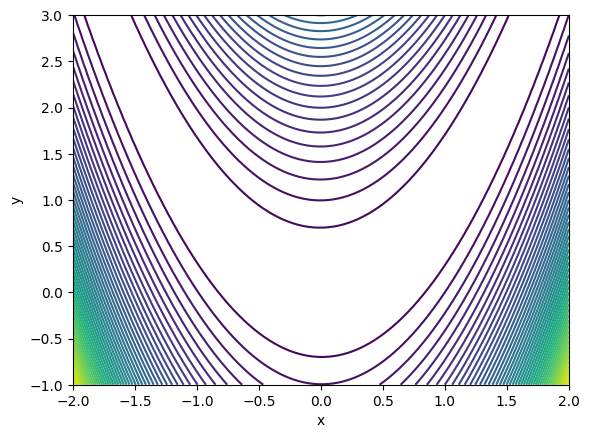

In [55]:
def rosenbrock(x, y):
    """
    The Rosenbrock function.
    """
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)   # this uses broadcasting both Xand Y are (10,10) arrays the Z that gets returned is a (10,10) 

plt.contour(X, Y, Z, levels=50)
# plt.imshow(Z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

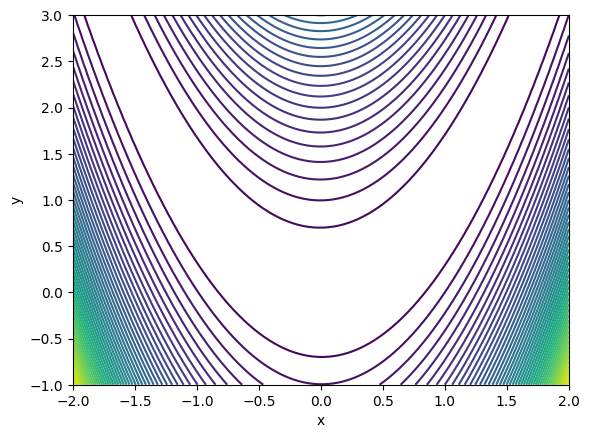

In [104]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = energy_function(np.array([ x[i], y[j] ]))

plt.contour(X, Y, Z, levels=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(2, 100, 100)
[-2. -1.]


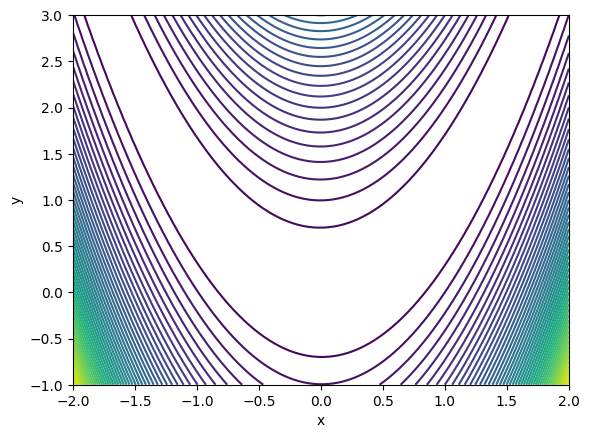

In [105]:
XY=np.vstack([[X],[Y]])
print(np.shape(XY))
print(XY[:,0,0])
for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = energy_function( XY[:,i,j] )
plt.contour(X, Y, Z, levels=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

2312.3870163587294
2312.3870163587294
(100, 100) (2,)


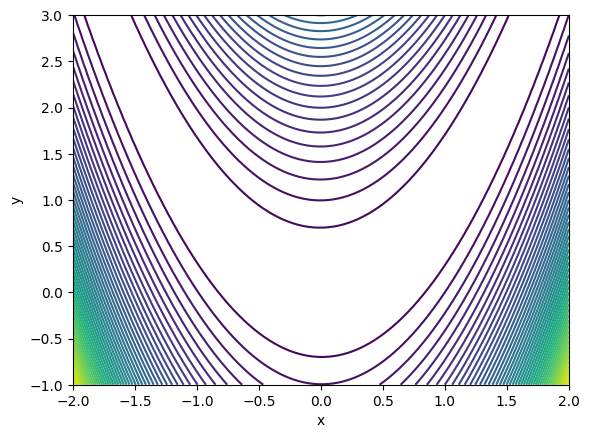

In [106]:
print(energy_function(XY[:,1,1]))
print(rosenbrock(x[1], y[1]))
print(np.shape(Z),np.shape(XY[:,1,1]))

Z=energy_function(XY)
plt.contour(X, Y, Z, levels=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()